## Visualizing the images

In [29]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from data.image_generator import get_generators
import matplotlib.pyplot as plt
from data.image_generator import create_GAF_images, create_MTF_images, create_RP_images
import numpy as np

In [30]:
# Import the dataset and call the function to transform the data
LABEL = "label"
NORMAL = "N"
VENTRICULAR = "V"
SUPER_VENTRICULAR = "S"


df = pd.read_csv("../dataset.csv")
df = df.iloc[:, 1:]
df = df.rename(columns={"0.1": LABEL})

super = df.loc[df.iloc[:,-1] == SUPER_VENTRICULAR].iloc[:1,:-1]
ventricular = df.loc[df.iloc[:, -1] == VENTRICULAR].iloc[:1, :-1]
normal = df.iloc[:1, :-1]


def get_image(data):
    gaf = create_GAF_images(data, image_size=32)
    mtf = create_MTF_images(data, image_size=32)
    rp = create_RP_images(data, image_size=32)
    gaf = np.expand_dims(gaf, axis=-1)
    mtf = np.expand_dims(mtf, axis=-1)
    rp = np.expand_dims(rp, axis=-1)

    return gaf, mtf, rp

# Get transformations from ecg data
super_gaf, super_mtf, super_rp = get_image(super)
ventricular_gaf, ventricular_mtf, ventricular_rp = get_image(ventricular)
normal_gaf, normal_mtf, normal_rp = get_image(normal)


[Text(0, 0.5, 'rp')]

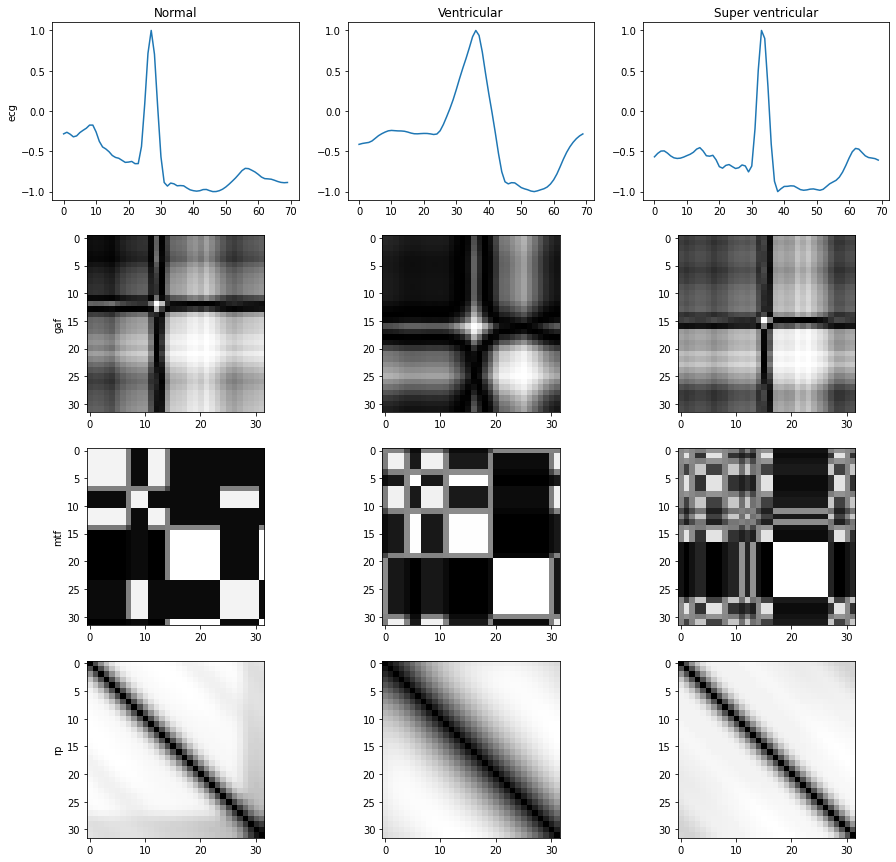

In [56]:
# All the transformations are shown. For more information please read the report.
x = range(70)
fig, axs = plt.subplots(4, 3, figsize=(15,15))
axs[0, 0].plot(x, normal.squeeze())
axs[0, 0].set_title("Normal")
axs[0, 1].plot(x, ventricular.squeeze())
axs[0, 1].set_title('Ventricular')
axs[0, 2].plot(x, super.squeeze())
axs[0, 2].set_title('Super ventricular')
axs[1, 0].imshow(normal_gaf.squeeze(), cmap='gray')
axs[1, 1].imshow(ventricular_gaf.squeeze(), cmap='gray')
axs[1, 2].imshow(super_gaf.squeeze(), cmap='gray')
axs[2, 0].imshow(normal_mtf.squeeze(), cmap='gray')
axs[2, 1].imshow(ventricular_mtf.squeeze(), cmap='gray')
axs[2, 2].imshow(super_mtf.squeeze(), cmap='gray')
axs[3, 0].imshow(normal_rp.squeeze(), cmap='gray')
axs[3, 1].imshow(ventricular_rp.squeeze(), cmap='gray')
axs[3, 2].imshow(super_rp.squeeze(), cmap='gray')

axs[0, 0].set(ylabel="ecg")
axs[1, 0].set(ylabel="gaf")
axs[2, 0].set(ylabel="mtf")
axs[3, 0].set(ylabel="rp")